##Mount Google Drive to allow access to apparel-test.dat file (pickle file)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

class Apparel:
  def __init__(self,date,name,category,type,rating,price,production_cost):
    self.date=date
    self.name=name
    self.category=category
    self.type=type
    self.rating=rating
    self.price=price
    self.production_cost=production_cost
    self.unique_id=id(self)

  def get_date(self):
    return self.date

  def get_name(self):
    return self.name

  def get_category(self):
    return self.category

  def get_type(self):
    return self.type

  def get_rating(self):
    return self.rating

  def get_price(self):
    return self.price

  def get_production_cost(self):
    return self.production_cost

  def set_date(self,date):
    self.date=date

  def set_name(self,name):
    self.name=name

  def set_category(self,category):
    self.category=category

  def set_type(self,type):
    self.type=type

  def set_rating(self,rating):
    self.rating=rating

  def set_price(self,price):
    self.price=price

  def set_production_cost(self,production_cost):
    self.production_cost=production_cost

  def __str__(self):
    return str(self.unique_id) + ',' + str(self.date) + ',' + str(self.name) + ',' + str(self.category) + ',' + str(self.type) + ',' + str(self.rating) + ',' + str(self.price) + ',' + str(self.production_cost)


In [3]:
class Pants(Apparel):
  def __init__(self,d,n,cat,rate,price,prod_cost):
    super().__init__(d,n,cat,'Pants',rate,price,prod_cost)

In [4]:
class Shirt(Apparel):
  def __init__(self,d,n,cat,rate,price,prod_cost):
    super().__init__(d,n,cat,'Shirt',rate,price,prod_cost)

In [5]:
class Jeans(Pants):
  def __init__(self,d,n,rate,price,prod_cost):
    super().__init__(d,n,"Jeans",rate,price,prod_cost)

In [6]:
class TShirt(Shirt):
  def __init__(self,d,n,rate,price,prod_cost):
    super().__init__(d,n,'TShirt',rate,price,prod_cost)

In [7]:
class FormalShirt(Shirt):
  def __init__(self,d,n,rate,price,prod_cost):
    super().__init__(d,n,'FormalShirt',rate,price,prod_cost)

In [8]:
# x=formalshirts('04-14-2024','tw','pants','test','4.5', '99.50', '45.50')
# print(x)

# y=apparel('04-14-2024', 'ss shirt', 'shirt', 'clothing', 10, 20.95, 2.43)
# print(y)


# changed the FormalShirt test to correctly match
# the attributes of its constructor call

x=FormalShirt('04-14-2024', 'Buttoned', 4.5, 99.50, 45.50)
print(x)

y=Apparel('04-14-2024', 'ss shirt', 'shirt', 'clothing', 10, 20.95, 2.43)
print(y)

# 8a testing code provided in the instructions is incorrect?
# Should instead call the class Jeans instead of Pants.

JeansApparel = Jeans('2022-03-13', 'Distressed Jeans', 3.0, 69.94, 42.89)
print(str(JeansApparel))

134268396401088,04-14-2024,Buttoned,FormalShirt,Shirt,4.5,99.5,45.5
134268396393408,04-14-2024,ss shirt,shirt,clothing,10,20.95,2.43
134268396394992,2022-03-13,Distressed Jeans,Jeans,Pants,3.0,69.94,42.89


In [9]:
# Read the data back from the .dat file
with open("/content/drive/MyDrive/apparel-test.dat", "rb") as f:
  retrieved_data = pickle.load(f)

# Write to data.csv
with open('data.csv', 'w') as f:
  f.write("unique_id,date,name,category,type,rating,price,production_cost\n")
  for obj in retrieved_data:
    f.write(str(obj)+'\n')

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

## Parsing and Cleaning the Data

In [11]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Data
df = pd.read_csv('data.csv')
print(df.head())
print(df.columns)

         unique_id        date                 name     category   type  \
0  132933434563344  2022-11-09  Classic White Shirt  FormalShirt  Shirt   
1  132933434567568  2022-04-01        Striped Shirt  FormalShirt  Shirt   
2  132933434564208  2022-01-04        Striped Shirt  FormalShirt  Shirt   
3  132933434563632  2022-02-28  Classic White Shirt  FormalShirt  Shirt   
4  132933434562816  2022-08-02        Plain T-Shirt       TShirt  Shirt   

   rating  price  production_cost  
0     4.0  60.45            47.07  
1     4.0  62.69            55.40  
2     4.0  71.73            58.36  
3     2.0  61.34            56.94  
4     2.0  62.98            57.92  
Index(['unique_id', 'date', 'name', 'category', 'type', 'rating', 'price',
       'production_cost'],
      dtype='object')


In [12]:
df.isna().sum()

,0
unique_id,0
date,410
name,0
category,0
type,0
rating,428
price,412
production_cost,391


In [13]:
df.isnull().sum()

,0
unique_id,0
date,410
name,0
category,0
type,0
rating,428
price,412
production_cost,391


In [14]:
print(df['date'].mode()[0])
print(df['rating'].mean())
print(df['price'].mean())
print(df['production_cost'].mean())

2022-01-30
2.9933138320100294
65.02434019042097
54.19655219065459


In [15]:
cols = ['date']

for column in cols:
  df[column].fillna(df[column].mode()[0], inplace=True)

In [16]:
cols = ['rating', 'price', 'production_cost']

for column in cols:
  df[column].fillna(df[column].mean(), inplace=True)

In [17]:
df.isna().sum()

,0
unique_id,0
date,0
name,0
category,0
type,0
rating,0
price,0
production_cost,0


In [18]:
df.isnull().sum()

,0
unique_id,0
date,0
name,0
category,0
type,0
rating,0
price,0
production_cost,0


##Data Visualizations

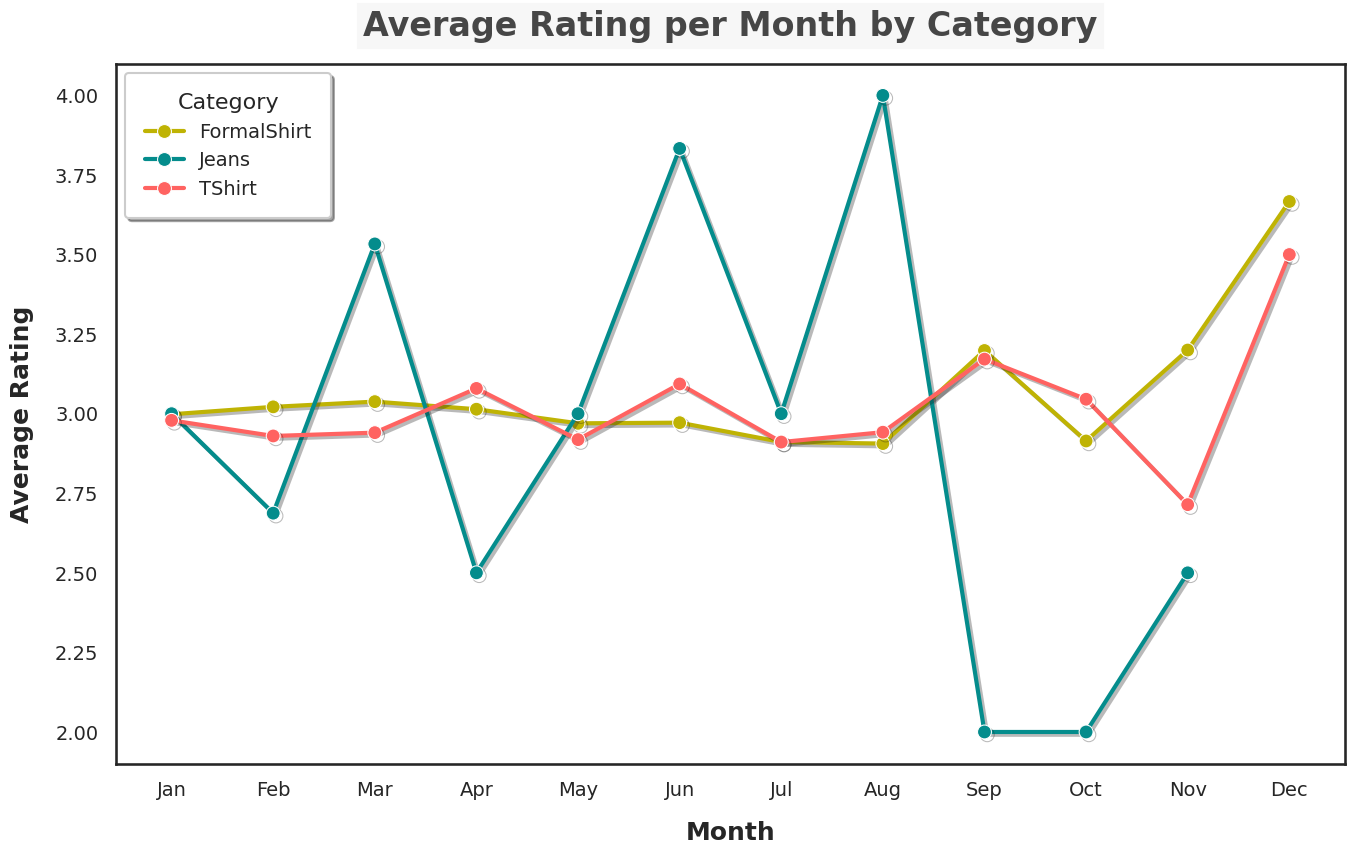

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Load the dataset
df = pd.read_csv('data.csv')

# Convert 'date' column to datetime format and sort the DataFrame by date
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Extract relevant columns and calculate average rating per month for each category
df['month'] = df['date'].dt.month
category_monthly_avg = df.groupby(['category', 'month'])['rating'].mean().reset_index()

# Set distinct, visually appealing colors inspired by the uploaded image: dark blue, light green, and orange
custom_palette = ['#BFB304', '#048C8C', '#FF6361']

# Initialize the seaborn style with more customization
sns.set(style="white", context="talk", font_scale=1.2)

# Create the line plot with seaborn
plt.figure(figsize=(14, 9))
sns.lineplot(data=category_monthly_avg,
             x='month', y='rating', hue='category',
             palette=custom_palette, marker='o', linewidth=3, markersize=10)

# Add a title with a shadow for effect
plt.title('Average Rating per Month by Category', fontsize=24, weight='bold', pad=20, loc='center',
          color='#333333', backgroundcolor='#f7f7f7', alpha=0.9)

# Customize the axis labels and ticks
plt.xlabel('Month', fontsize=18, weight='bold', labelpad=15)
plt.ylabel('Average Rating', fontsize=18, weight='bold', labelpad=15)

# Set the x-ticks (month labels) without bold formatting
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)

# Set the y-ticks without bold formatting
plt.yticks(fontsize=14)

# Customize the legend
plt.legend(title='Category', title_fontsize='16', fontsize='14', loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Improve layout with tight layout
plt.tight_layout()

# Add a subtle background color and grid customization
#plt.gca().set_facecolor('#f7f7f7')
#plt.grid(True, which='major', linestyle='--', linewidth=0.8, color='#bbbbbb')

# Adding a slight shadow to the lines using patheffects
for line in plt.gca().get_lines():
    line.set_path_effects([path_effects.SimpleLineShadow(), path_effects.Normal()])

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('LinePlot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


For the plot graph. We wanted to see what is the avergage rating across each category for every month to determine the popularity of a category throughout the year. Based on the visualization, we can see that Jean are more popular in March, June & August. Tshirts and Peans share a higher popularity in the month of June, suggesting that Jeans and Tshirts should be marketed together to improve sales.

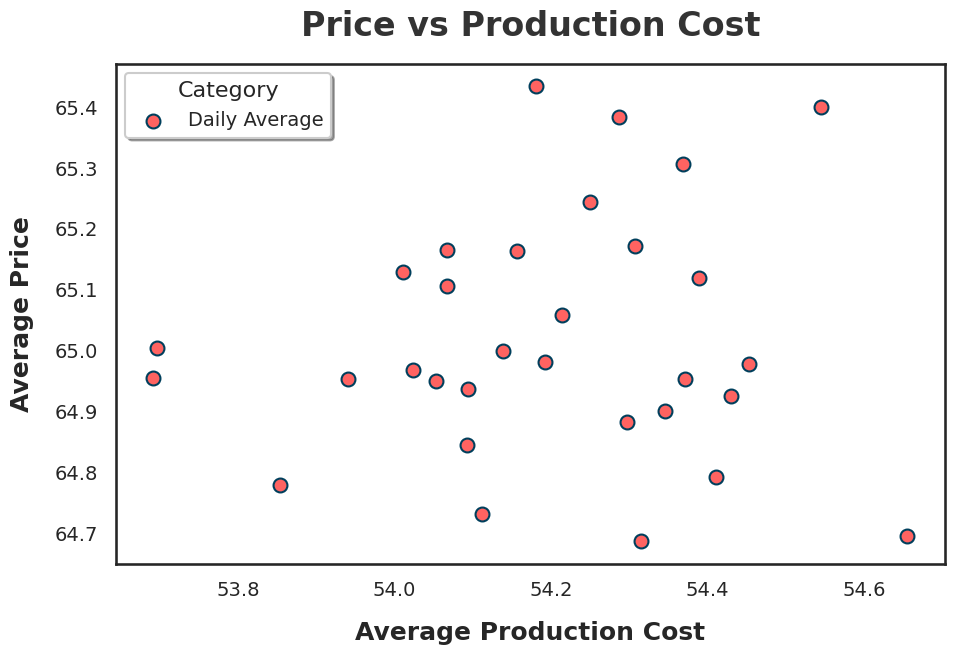

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Convert 'date' column to datetime format, sort the DataFrame by date, and set the date as the index
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

# Select relevant columns and calculate daily average production cost and price
var = df[['production_cost', 'price', 'rating']]
vasr_s = var.groupby(var.index.day)[['production_cost', 'price']].mean()

# Set seaborn style for a more polished look
sns.set(style="white", context="talk", font_scale=1.2)

# Initialize the plot with a larger figure size
plt.figure(figsize=(10, 7))

# Create a scatter plot with a visually appealing color palette
scatter_plot = sns.scatterplot(x=vasr_s['production_cost'],
                               y=vasr_s['price'],
                               s=100, color='#ff6361',
                               edgecolor='#003f5c',
                               linewidth=1.5, label='Daily Average')

# Customize title and labels with more appealing fonts and weights
plt.title('Price vs Production Cost', fontsize=24, weight='bold', pad=20, color='#333333')
plt.xlabel('Average Production Cost', fontsize=18, weight='bold', labelpad=15)
plt.ylabel('Average Price', fontsize=18, weight='bold', labelpad=15)

# Customize ticks on the x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid for better readability
#plt.grid(True, which='major', linestyle='--', linewidth=0.8, color='#bbbbbb')

# Customize the legend
plt.legend(title='Category', title_fontsize='16', fontsize='14', loc='upper left', fancybox=True, framealpha=1, shadow=True)

# Improve layout with tight layout
plt.tight_layout()

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('ScatterPlot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


We are leveaging a scatter plot to see if there are any correlations between the average cost and average price per day. Based on the data collected, there is no correlation between average cost and the average price of the items purchased. Based on the information Majority of items purchased range between 64.90 and 65.20 dollars and 54 to 54.40 to produce. This means that profit margins for most producst are around 10 dollars.

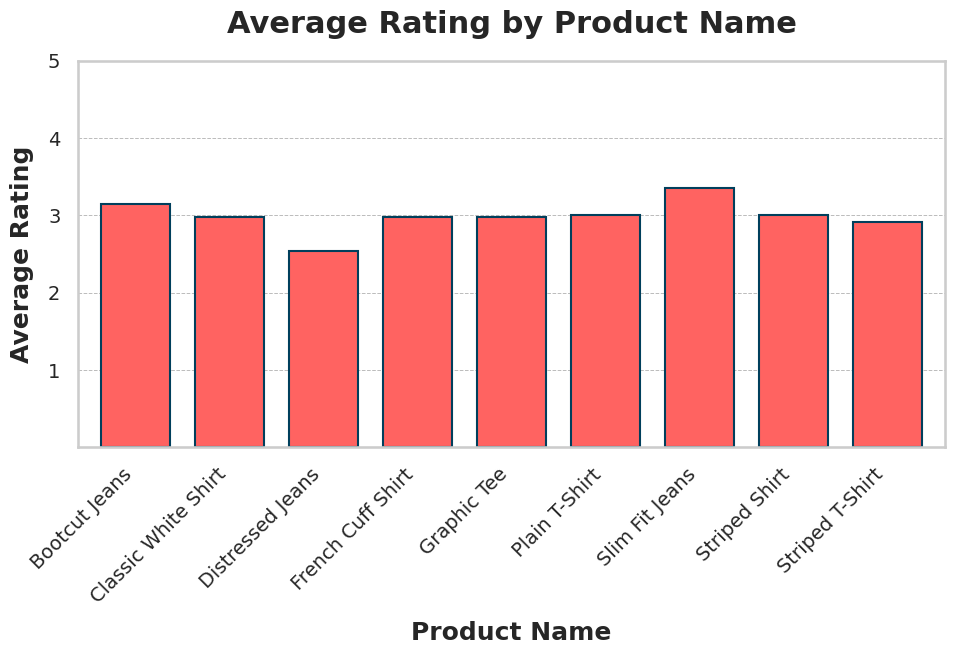

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the aesthetic style of the plots
sns.set(style='whitegrid', context='talk', font_scale=1.2)

# Bar Chart: Average Rating by Product Name
avg_price_by_category = df.groupby('name')['rating'].mean()

# Set up the figure with a larger size and white background
plt.figure(figsize=(10, 7), facecolor='white')

# Use a visually appealing color palette for the bars
custom_color = '#ff6361'  # Coral color for bars
edge_color = '#003f5c'    # Dark blue edge for contrast

# Plot the bar chart
bars = avg_price_by_category.plot(kind='bar', color=custom_color, width=0.73, edgecolor=edge_color, linewidth=1.5)

# Customize the title and labels with bold and larger fonts
plt.title('Average Rating by Product Name', fontsize=22, weight='bold', pad=20)
plt.xlabel('Product Name', fontsize=18, weight='bold', labelpad=10)
plt.ylabel('Average Rating', fontsize=18, weight='bold', labelpad=10)

# Rotate x-ticks and adjust font size for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Customize y-ticks, setting the range of ratings (1 to 5)
plt.yticks(np.arange(1, 6, step=1), fontsize=14)

# Add subtle grid lines for the y-axis only (for readability)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='#bbbbbb')

# Remove x-axis grid lines
plt.gca().xaxis.grid(False)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('BarChart.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Average rating for 9 different categories of clothing items.
Comparing the average rating to the product name, we see that based on our data Distressed Jeans have the lowest rating…
while Slim Fit Jeans have the highest average rating.


In [22]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Data
df = pd.read_csv('data.csv')
print(df.head())
print(df.columns)

         unique_id        date                 name     category   type  \
0  132933434563344  2022-11-09  Classic White Shirt  FormalShirt  Shirt   
1  132933434567568  2022-04-01        Striped Shirt  FormalShirt  Shirt   
2  132933434564208  2022-01-04        Striped Shirt  FormalShirt  Shirt   
3  132933434563632  2022-02-28  Classic White Shirt  FormalShirt  Shirt   
4  132933434562816  2022-08-02        Plain T-Shirt       TShirt  Shirt   

   rating  price  production_cost  
0     4.0  60.45            47.07  
1     4.0  62.69            55.40  
2     4.0  71.73            58.36  
3     2.0  61.34            56.94  
4     2.0  62.98            57.92  
Index(['unique_id', 'date', 'name', 'category', 'type', 'rating', 'price',
       'production_cost'],
      dtype='object')


<ipython-input-23-ed0d6d168b1b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='price', data=df, palette=custom_palette, linewidth=2.5, saturation=0.9)
<ipython-input-23-ed0d6d168b1b>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='type', y='price', data=df, palette=custom_palette, linewidth=2.5, saturation=0.9)


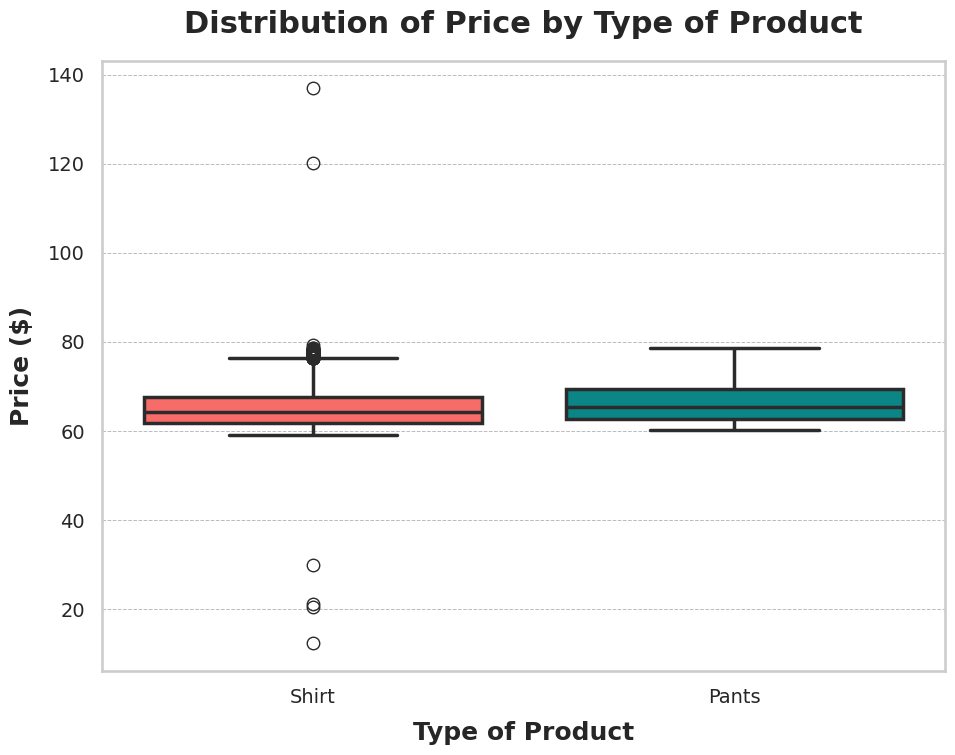

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Boxplot: Distribution of Price by Type of Product
plt.figure(figsize=(10, 8), facecolor='white')

# Customize the color palette
custom_palette = sns.color_palette(['#ff6361', '#048C8C', '#58508d'])  # Vibrant colors

# Create the boxplot with the custom palette and larger linewidth for clarity
sns.boxplot(x='type', y='price', data=df, palette=custom_palette, linewidth=2.5, saturation=0.9)

# Add a title and axis labels with bold and larger fonts
plt.title('Distribution of Price by Type of Product', fontsize=22, weight='bold', pad=20)
plt.xlabel('Type of Product', fontsize=18, weight='bold', labelpad=10)
plt.ylabel('Price ($)', fontsize=18, weight='bold', labelpad=10)

# Customize x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines for better readability on the y-axis only
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='#bbbbbb')

# Improve layout to avoid clipping
plt.tight_layout()

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('BoxPlot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Here, we can observe the comparison happening between Distr. Of Price based on the type of product, as well as the Price.

The price of shirts appears to be lower than the price of pants. The median price for shirts is around 60 while the median price for pants is closer to $100.


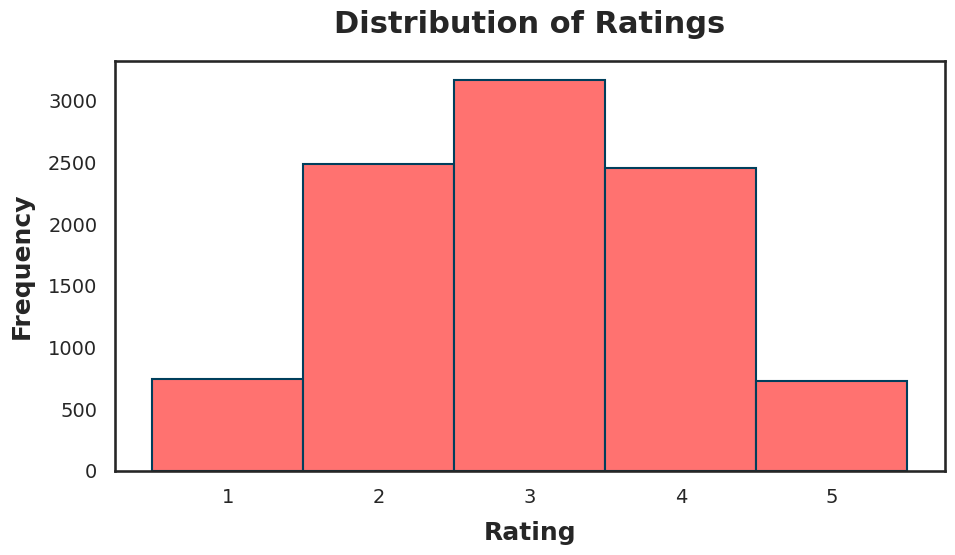

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="white", context="talk", font_scale=1.2)

# Histogram: Frequency of Ratings
plt.figure(figsize=(10, 6), facecolor='white')

# Use a visually appealing color with edgecolor for clarity
custom_color = '#ff6361'  # Vibrant coral color for bars
edge_color = '#003f5c'    # Dark blue edge for contrast

# Create the histogram with binwidth=1 to ensure alignment with the x-axis values (1-5)
sns.histplot(df['rating'], bins=np.arange(0.5, 6.5, 1), color=custom_color, edgecolor=edge_color, kde=False, alpha=0.9)

# Add a title and axis labels with bold and larger fonts
plt.title('Distribution of Ratings', fontsize=22, weight='bold', pad=20)
plt.xlabel('Rating', fontsize=18, weight='bold', labelpad=10)
plt.ylabel('Frequency', fontsize=18, weight='bold', labelpad=10)

# Customize the x-ticks to align with the ratings (1 to 5), centering them with the bars
plt.xticks(np.arange(1, 6, step=1), fontsize=14)

# Customize the y-ticks
plt.yticks(fontsize=14)

# Add a subtle grid for the y-axis
#plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='#bbbbbb')

# Ensure the layout is tight and nothing is cut off
plt.tight_layout()

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('Histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


This histogram presents the frequency distribution of each individual rating.​ The dataset comprises a total of 10,000 ratings.​ Upon comparison with a standard Gaussian distribution, we observe a close correspondence in the data. The rating of 3 (average) emerges as the most frequently assigned to products, with ratings of 2 (very bad) and 4 (very good) also prevalent. Ratings of 1 (terrible) and 5 (excellent) are less common.​

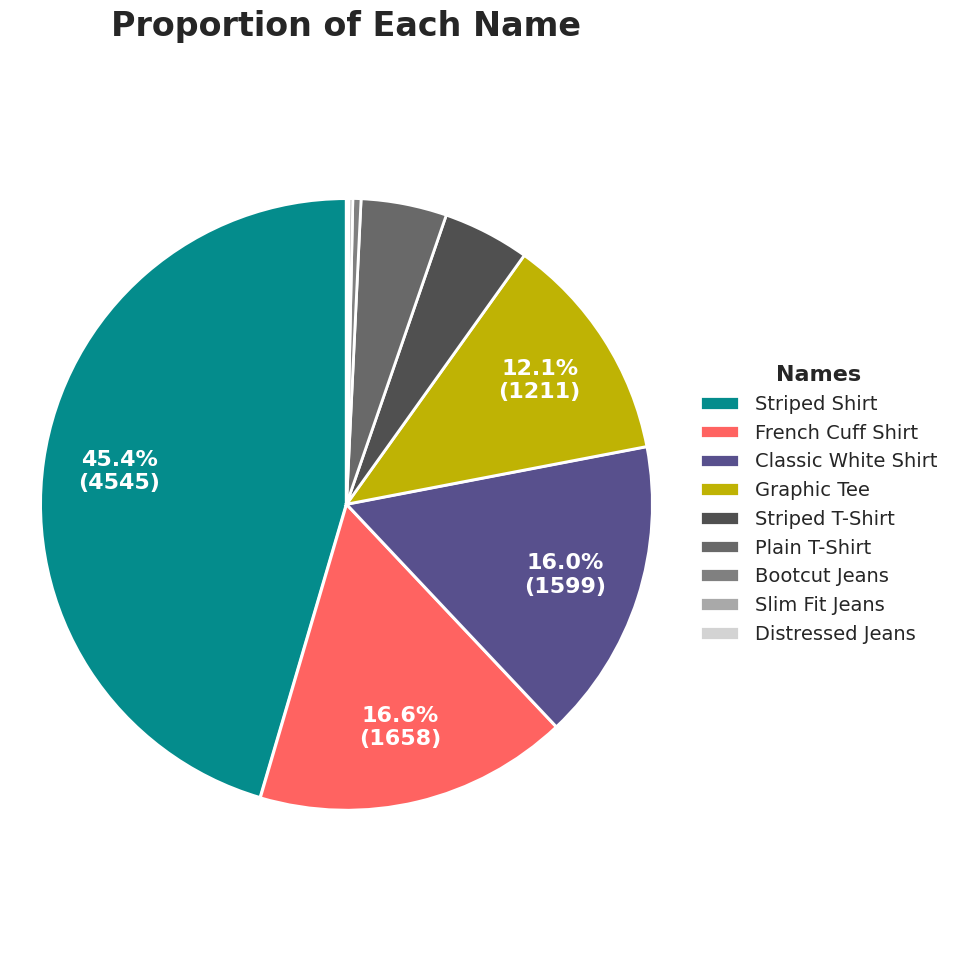

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn aesthetic styling
sns.set(style="white", context="talk", font_scale=1.2)

# Pie Chart
name_counts = df['name'].value_counts()

# Function to format percentage labels (shows only when pct > 2%)
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})' if pct > 10 else ''
    return my_autopct

# Create custom color palette based on percentage '#BFB304', '#048C8C', '#FF6361'
def create_custom_palette(values, threshold=10):
    vibrant_colors = ['#048C8C', '#FF6361', '#58508d', '#BFB304']  # Colors for > 10%
    grayscale_colors = ['#505050', '#696969', '#808080', '#a9a9a9', '#d3d3d3']  # Grayscale for <= 10%
    palette = []
    total = sum(values)

    for value in values:
        pct = (value / total) * 100
        if pct > threshold:
            # If the percentage is above 10%, use a vibrant color
            palette.append(vibrant_colors.pop(0))
        else:
            # If the percentage is 10% or lower, use a grayscale color
            palette.append(grayscale_colors.pop(0))

    return palette

# Create the custom color palette
custom_palette = create_custom_palette(name_counts)

plt.figure(figsize=(10, 10), facecolor='white')

# Create the pie chart with updated colors and added separation between slices
wedges, texts, autotexts = plt.pie(
    name_counts,
    labels=None,
    autopct=autopct_format(name_counts),
    startangle=90,
    colors=custom_palette,
    pctdistance=0.75,
    textprops={'fontsize': 16, 'weight': 'bold'},  # Make the percentage text slightly bold
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Add space between wedges for clarity
    explode=[0.001] * len(name_counts)  # Slightly separate the slices for visual appeal
)

# Change the color of the percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')

# Customize the title and position
plt.title('Proportion of Each Name', fontsize=24, weight='bold', pad=20)

# Create a well-positioned legend with bold fonts and appropriate sizing
plt.legend(
    labels=name_counts.index,
    title='Names',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=14,
    title_fontproperties={'size' : 16, 'weight': 'bold'},
    frameon=False  # Remove box around legend
)


# Ensure the pie is drawn as a circle (aspect ratio equal)
plt.axis('equal')

# Improve the layout to avoid any label cutoff
plt.tight_layout()

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('PieChart.png', dpi=300, bbox_inches='tight')

# Show the pie chart
plt.show()


Here we see the percentage of each item name. There are 4 major items, or items with a percentage of 10% or more.​ Striped shirts make up almost half of all orders.​ Shirts are much more popular than pants.​ Pants are almost negligible in terms of transactions.​

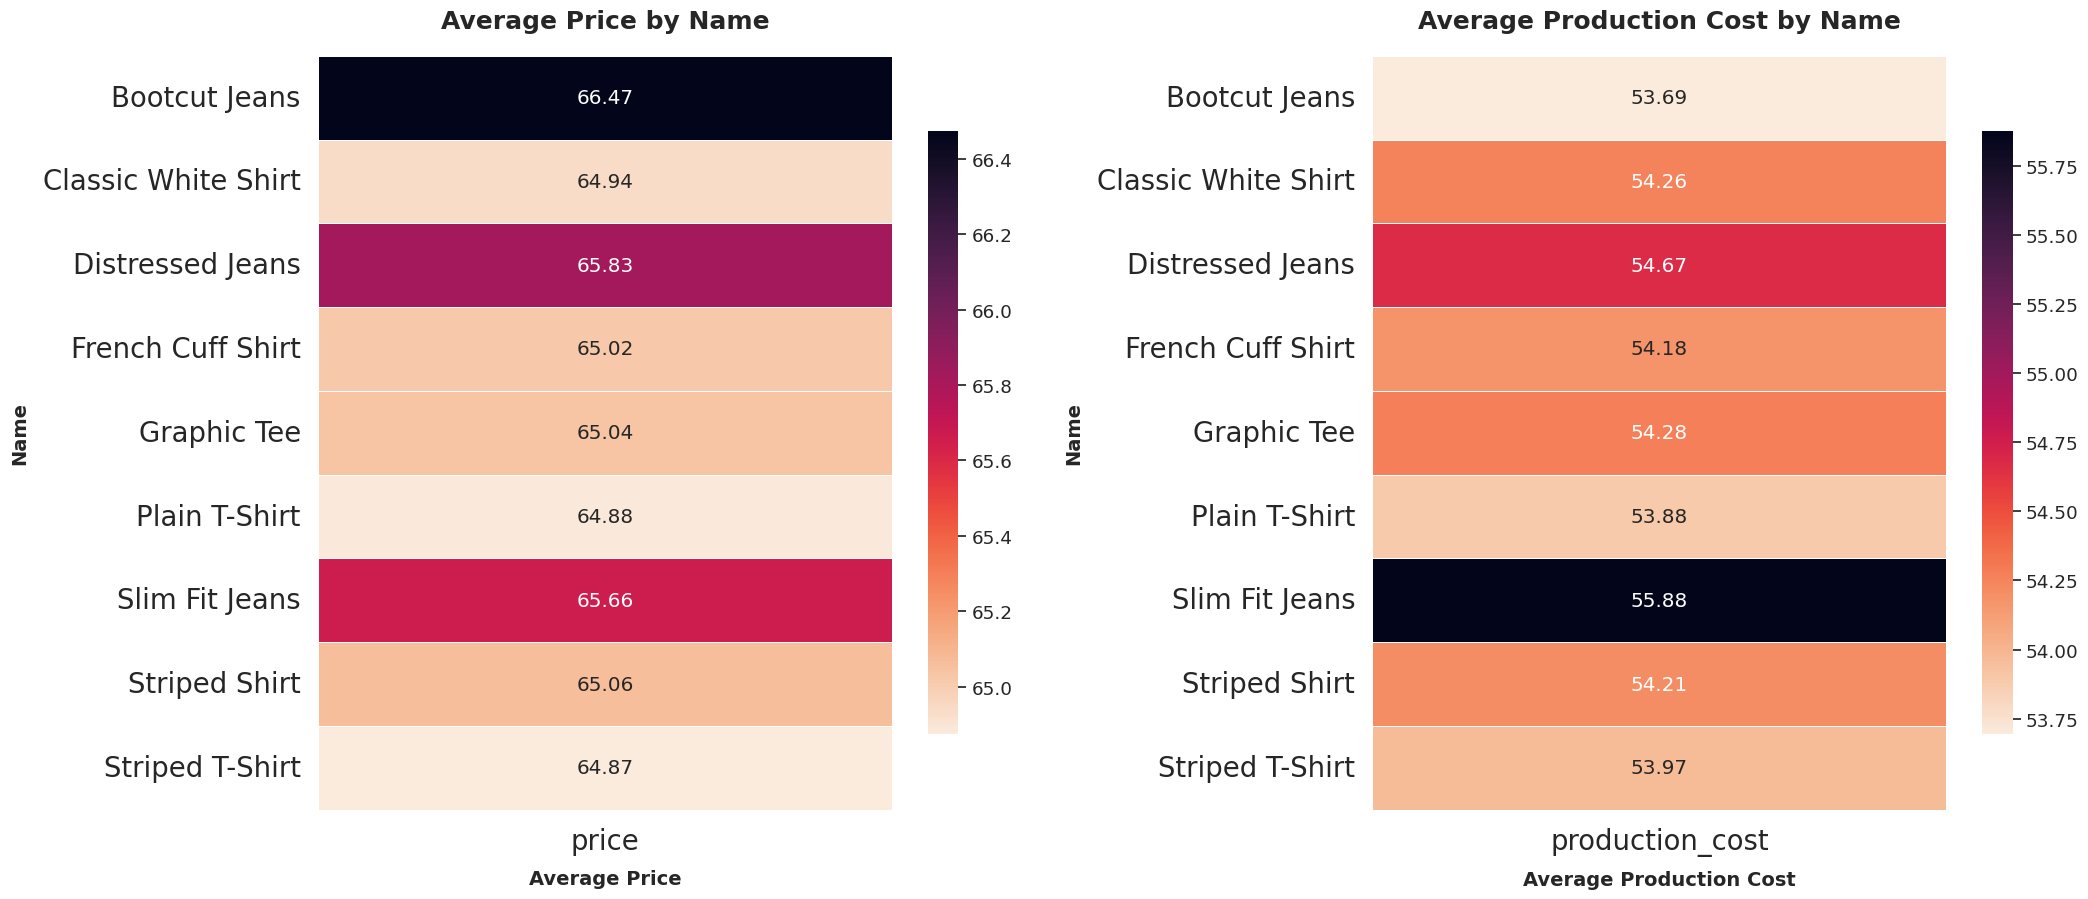

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already loaded into 'df'
category_avg = df.groupby('name')[['price', 'production_cost']].mean().reset_index()

pivot_data_price = category_avg.pivot_table(index='name', values='price', aggfunc='mean')
pivot_data_cost = category_avg.pivot_table(index='name', values='production_cost', aggfunc='mean')

# Create subplot with larger figure size and white background
fig, ax = plt.subplots(1, 2, figsize=(22, 10), facecolor='white')

# Customize the Seaborn heatmap style
sns.set(style="white", font_scale=1.2)

# Price heatmap with a visually appealing color palette and annotations
sns.heatmap(pivot_data_price, annot=True, cmap='rocket_r', fmt='.2f',
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8}, ax=ax[0])
ax[0].set_title('Average Price by Name', fontsize=18, weight='bold', pad=20)
ax[0].set_xlabel('Average Price', fontsize=14, weight='bold', labelpad=10)
ax[0].set_ylabel('Name', fontsize=14, weight='bold', labelpad=10)

# Production cost heatmap with the same color palette for consistency
sns.heatmap(pivot_data_cost, annot=True, cmap='rocket_r', fmt='.2f',
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8}, ax=ax[1])
ax[1].set_title('Average Production Cost by Name', fontsize=18, weight='bold', pad=20)
ax[1].set_xlabel('Average Production Cost', fontsize=14, weight='bold', labelpad=10)
ax[1].set_ylabel('Name', fontsize=14, weight='bold', labelpad=10)

# Adjust layout to ensure spacing is optimal and labels are visible
plt.tight_layout(pad=3)

# Save the figure as a high-quality image (e.g., PNG with 300 dpi)
plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


For the heatmap, we examined price vs. production cost across all products offered to determine if there was a relationship between the price of an item and its production cost. It also allowed for us to determine which product has the healthiest profit margin and which has the lowest profit margin

##Conclusion

In Conclusion.  We recommend that this apparel company focus marketing and sales efforts around improving attach rate of less popular items to most popular.  Based on the ratings over the course of the year, Tshirts and Jeans share similar peak rating in June. Need to leverage promotions to improve attach rates in June to include both categories.  As bootcut jeans reflect the highest profit margins, and Tshirts represent roughly 20% of sold goods.  Reccomend leveraging bootcut jeans as the target item for attaching to tshirt sales in popular months.